In [205]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score, classification_report
from collections import Counter
from itertools import product

## Load Data

In [209]:
#creates a dataframe from a file
df = pd.read_csv("Postures.csv")

#info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [210]:
df

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,?,?,?,?,?,?
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,?,?,?,?,?,?
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,?,?,?,?,?,?
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,?,?,?,?,?,?,?,?,?


## Exploratory Data Analysis (EDA)


In [211]:
#check for duplicates
print(df.duplicated().sum())

#typically this next step should be in data processing but without it the EDA would be less meaningful
#replacing the ? values with Nan values 
df.replace('?', np.nan, inplace=True)#({'?': np.nan})

#convert all object columns to float
columns_list = df.columns.tolist()

#X3 column starts the type object columns
feature_until_x3 = 11
apply_conv_to_obj = len(columns_list) - feature_until_x3 

for column_obj in range (apply_conv_to_obj):
    apply = feature_until_x3 + column_obj
    
    #print (f"columns_list[apply] {columns_list[apply]}")
    df[columns_list[apply]] = df[columns_list[apply]].astype(float)



print("\n",df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      77406 non-null  float64
 12  Y3      77406 non-null  float64
 13  Z3      77406 non-null  float64
 14  X4      74976 non-null  float64
 15  Y4      74976 non-null  float64
 16  Z4      74976 non-null  float64
 17  X5      65073 non-null  float64
 18  Y5      65073 non-null  float64
 19  Z5      65073 non-null  float64
 20  X6      52248 non-null  float64
 21  Y6      52248 non-null  float64
 

In [212]:
#statistical info of the data
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
count,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,...,30564.000000,23968.000000,23968.000000,23968.000000,14753.000000,14753.000000,14753.000000,32.000000,32.000000,32.000000
mean,2.983738,7.959127,50.345664,85.812051,-29.984712,49.595209,86.192647,-29.509202,48.612121,83.771315,...,-24.364044,54.746717,80.542435,-27.776883,53.755031,73.998602,-29.735972,-28.769563,25.151977,1.644271
std,1.421183,4.697810,32.696173,40.204363,34.361918,32.478238,40.453214,34.764398,33.605390,41.023543,...,35.736347,39.970672,42.676118,36.250738,38.461088,42.915225,39.677816,49.754171,36.538582,19.655609
min,0.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,...,-142.654497,-99.231688,-64.734284,-113.397327,-80.196289,-65.019295,-112.668930,-96.951690,-65.432143,-48.274677
25%,2.000000,5.000000,29.295062,63.494432,-56.356438,28.755137,64.154529,-57.360107,25.170006,58.052385,...,-52.521279,26.113866,44.034191,-55.618297,20.406693,37.697395,-62.953012,-62.608867,21.795335,-3.829163
50%,3.000000,9.000000,54.619964,86.526246,-30.864125,54.215514,87.542751,-30.184005,53.814580,86.458324,...,-22.457956,61.992034,84.738571,-26.796695,61.843506,78.987241,-32.909286,-48.524085,38.748102,11.205787
75%,4.000000,12.000000,72.488686,113.107355,-1.418803,71.762039,116.219398,-0.366692,71.561951,106.660827,...,6.415435,83.766641,115.555248,3.064292,83.054781,100.947816,6.060066,0.645542,40.702633,12.789386
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,...,119.213101,174.054403,167.942588,123.380512,149.486224,168.352478,108.455548,84.683328,127.945490,18.062286


### Histogram


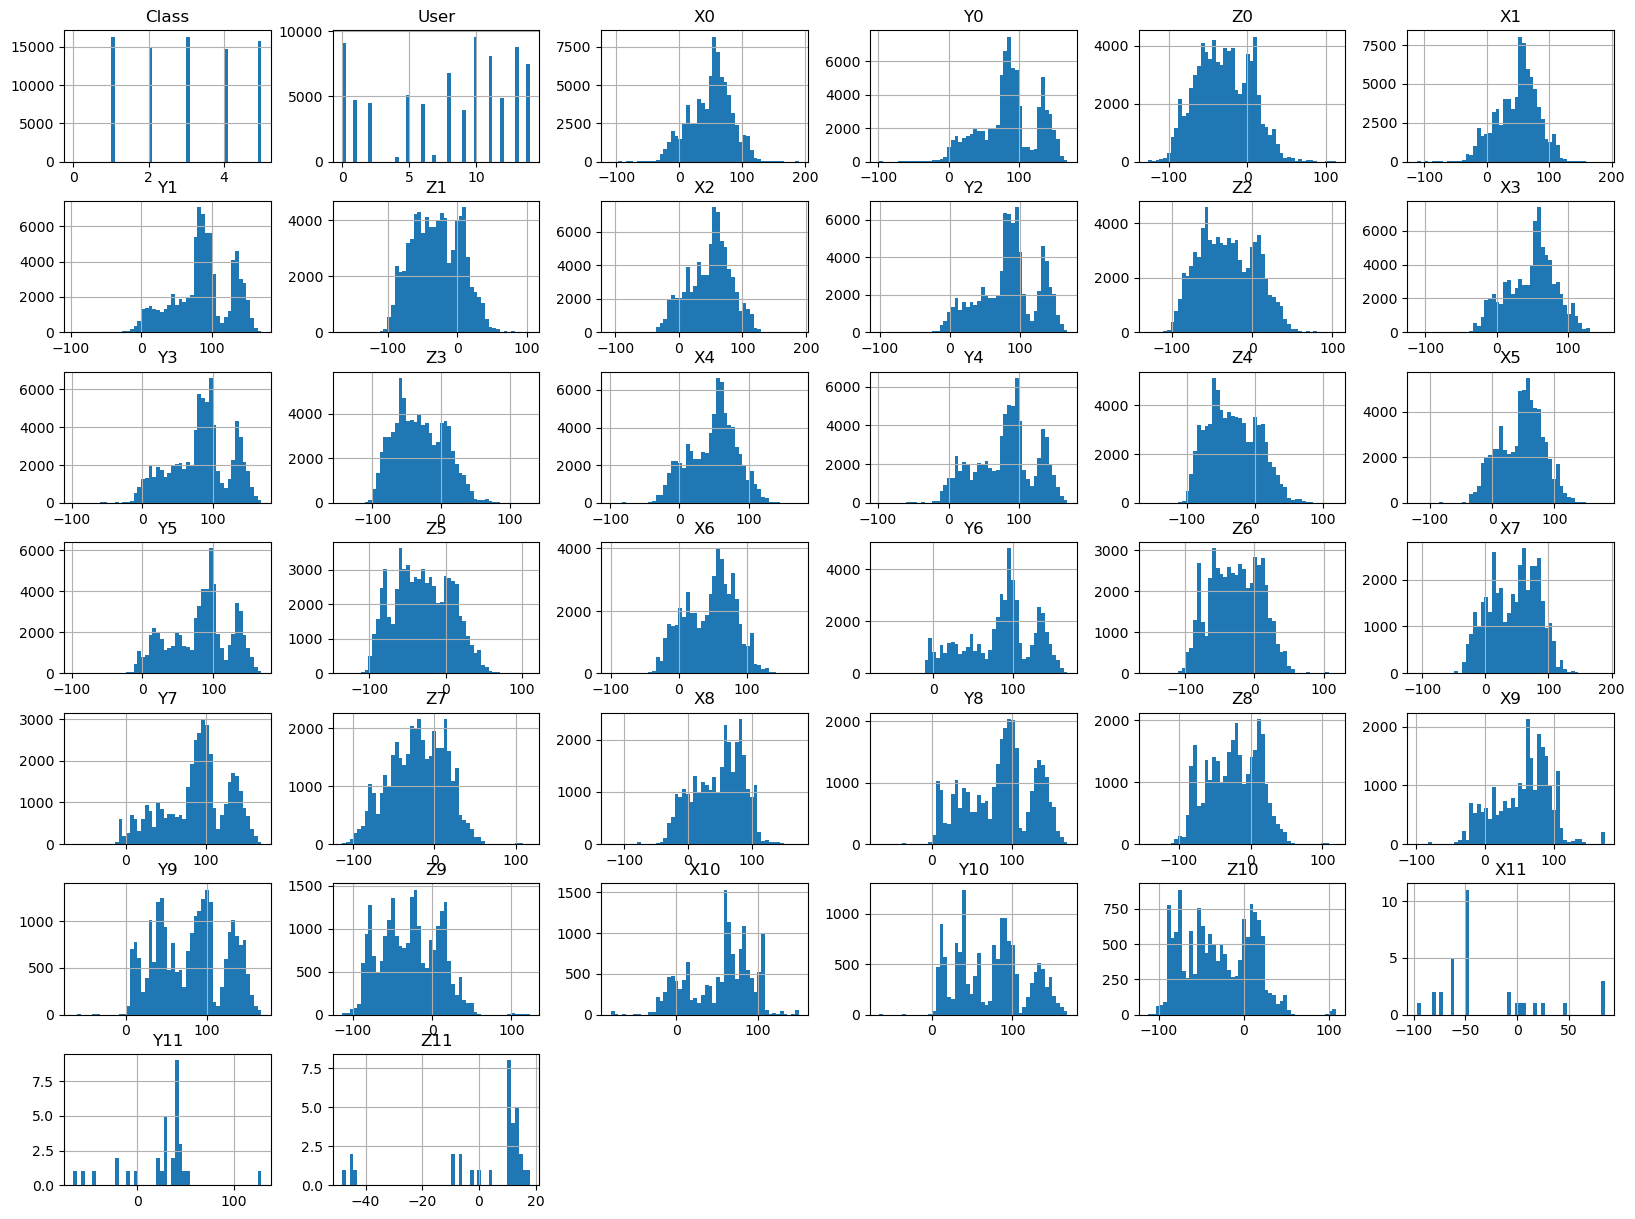

In [213]:
df.hist(bins=50, figsize=(20,15))
plt.show()

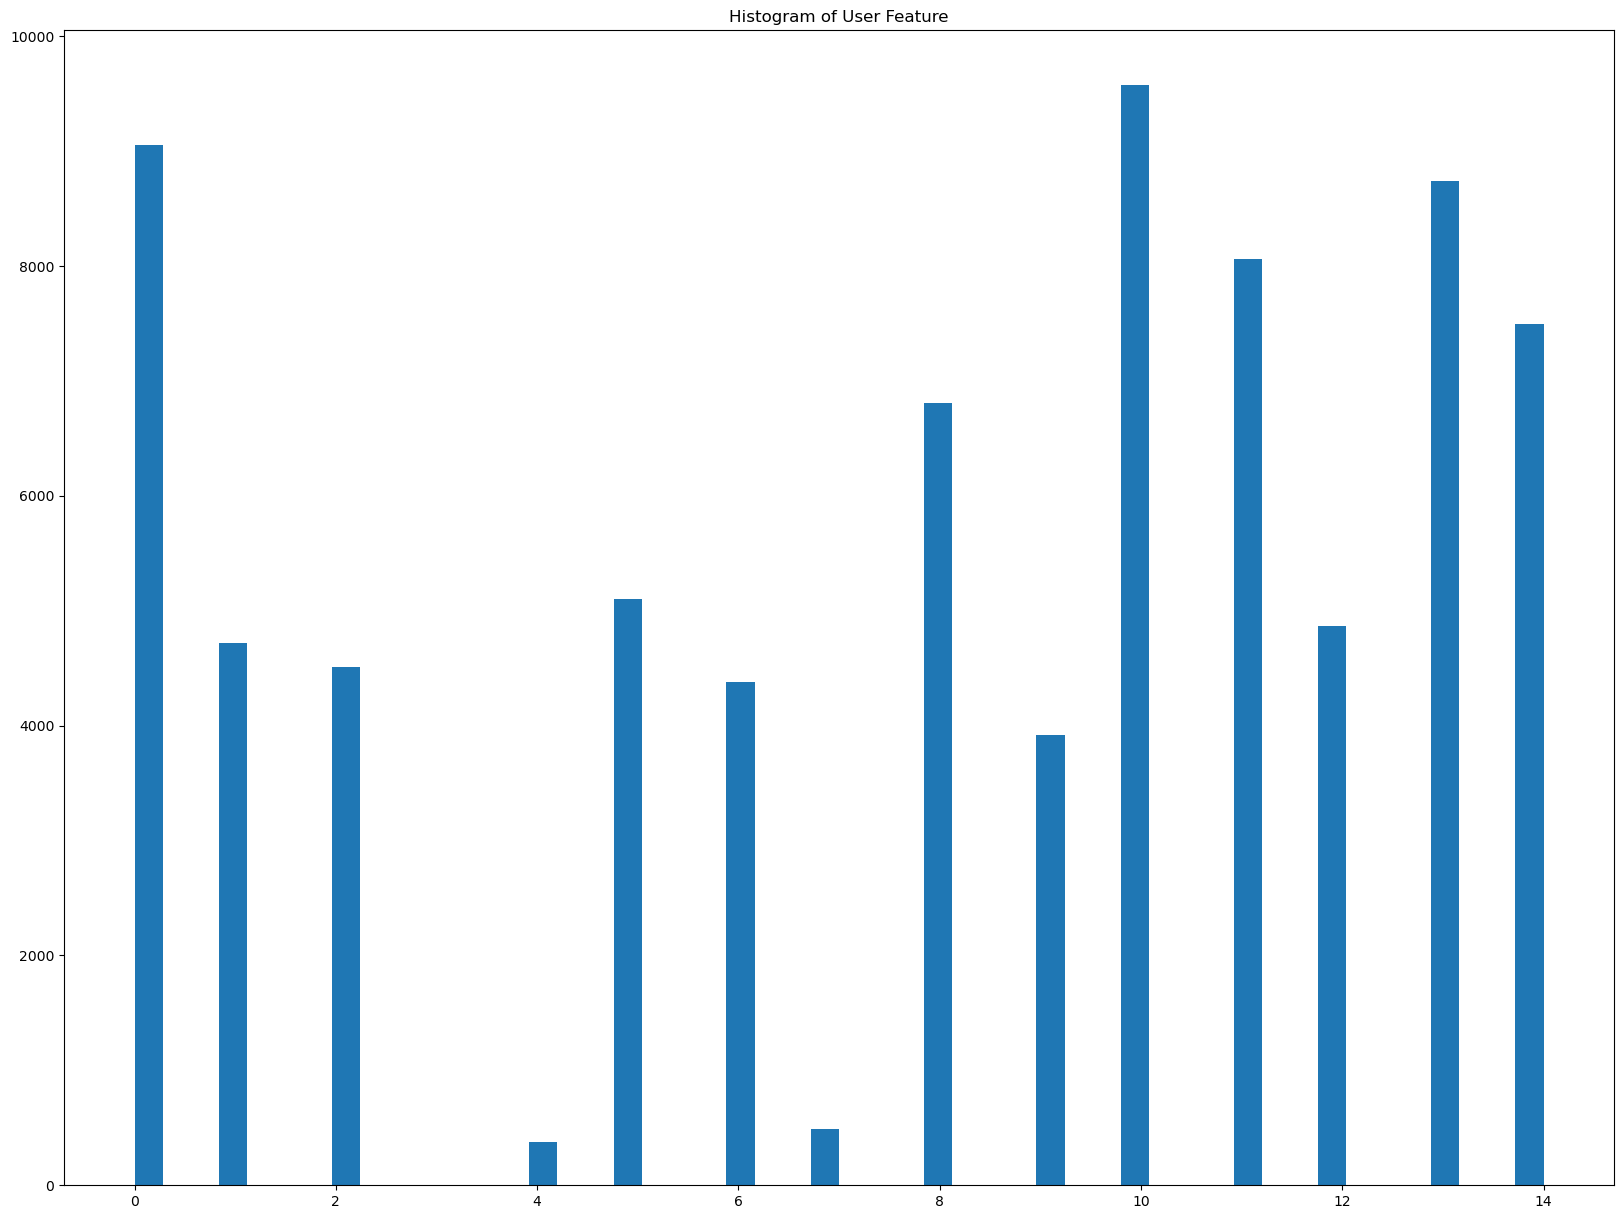

In [214]:
#histogram of user

hist, bin_edges = np.histogram(df['User'], bins=50)
plt.figure(figsize=(20,15))
plt.hist(df['User'], bins=50)
plt.title('Histogram of User Feature')
plt.show()

### Check for Outliers
Identify outliers and anomalies in the data.

df.columns.tolist() ['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11']
column_1 2 column_2 3 column_3 4
column_1 5 column_2 6 column_3 7
column_1 8 column_2 9 column_3 10
column_1 11 column_2 12 column_3 13
column_1 14 column_2 15 column_3 16
column_1 17 column_2 18 column_3 19
column_1 20 column_2 21 column_3 22
column_1 23 column_2 24 column_3 25
column_1 26 column_2 27 column_3 28
column_1 29 column_2 30 column_3 31
column_1 32 column_2 33 column_3 34
column_1 35 column_2 36 column_3 37


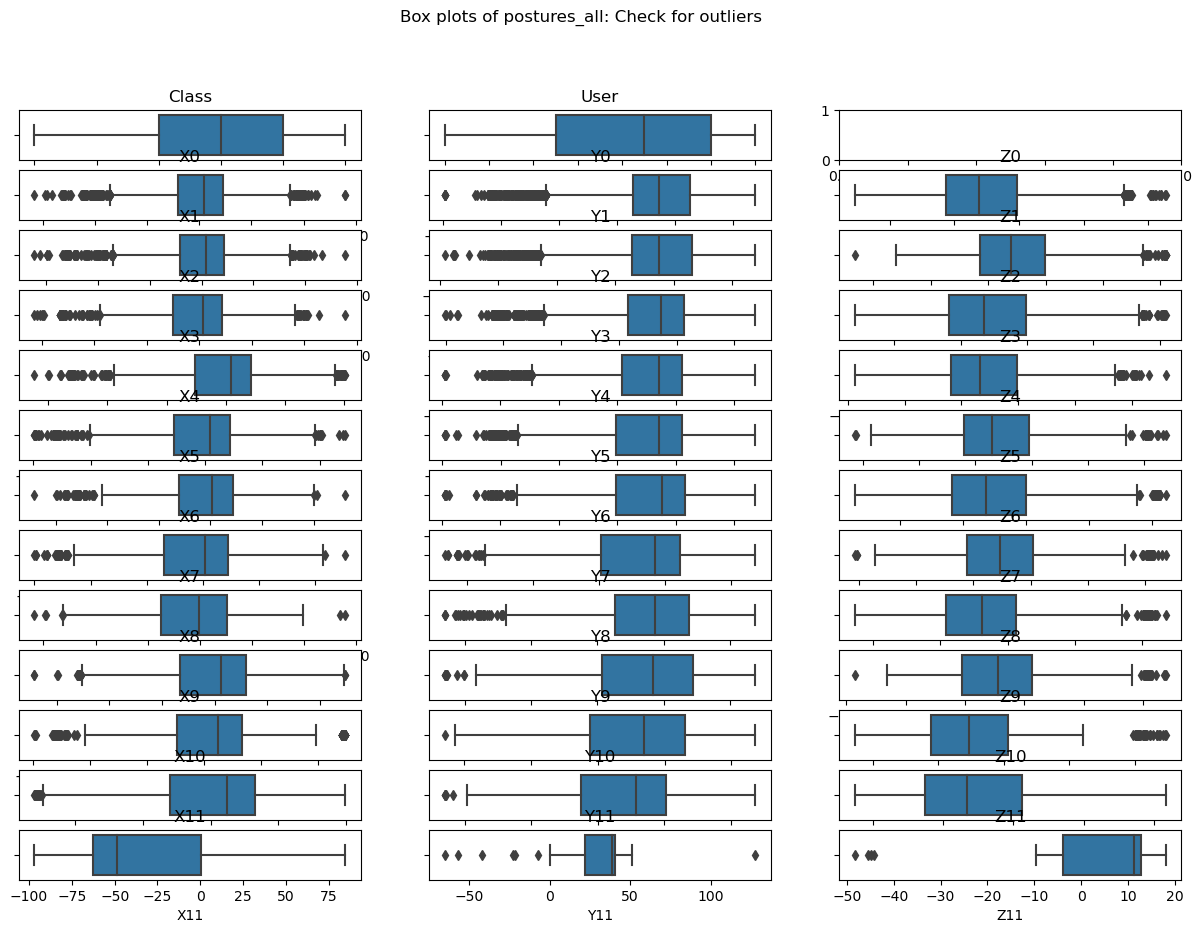

In [215]:
# Check for outliers

# Create a grid of subplots
# 3 columns and 13 rows to represent the 39 columns of the dataset
fig, axs = plt.subplots(ncols=3, nrows=13, figsize=(15, 10))

columns_list = df.columns.tolist()
print (f"df.columns.tolist() {columns_list }")

# Set titles
axs[0, 0].set_title(columns_list[0])
axs[0, 1].set_title(columns_list[1])

for line in range (12): # apply  to the 0-11
    line_plus_1 = line + 1
    
    axs[line_plus_1, 0].set_title(columns_list[2+line*3])
    axs[line_plus_1, 1].set_title(columns_list[3+line*3])
    axs[line_plus_1, 2].set_title(columns_list[4+line*3])

sns.boxplot(x=df[columns_list[0]], ax=axs[0, 0])
sns.boxplot(x=df[columns_list[1]], ax=axs[0, 1])


for line in range (12): # apply  to the 0-11
    line_plus_1 = line + 1
    
    column_1 = 2+line*3
    column_2 = 3+line*3
    column_3 = 4+line*3
    print (f"column_1 {column_1} column_2 {column_2} column_3 {column_3}")
    sns.boxplot(x=df[columns_list[column_1]], ax=axs[line_plus_1, 0])
    sns.boxplot(x=df[columns_list[column_2]], ax=axs[line_plus_1, 1])
    sns.boxplot(x=df[columns_list[column_3]], ax=axs[line_plus_1, 2])

    # Add a title to the entire figure
fig.suptitle('Box plots of postures_all: Check for outliers')
plt.show()

### Looking for correlations


Correlations Matrix

Class    1.000000
Y9       0.232697
Y10      0.172631
Y3       0.169636
Y2       0.169296
Y8       0.167774
Y4       0.167576
Y1       0.144135
Y11      0.125613
Y5       0.119431
Z2       0.095512
Z1       0.089894
Y0       0.081808
Z3       0.081754
X0       0.080209
Y7       0.062988
Y6       0.062274
X10      0.053492
Z0       0.051832
Z4       0.050872
Z11      0.015265
X1      -0.010528
Z5      -0.027608
User    -0.030667
Z10     -0.048124
X6      -0.051873
X2      -0.052351
X5      -0.052454
X4      -0.055786
X3      -0.056136
Z9      -0.075456
X9      -0.086346
X11     -0.105516
X7      -0.106753
X8      -0.119278
Z8      -0.119760
Z6      -0.157359
Z7      -0.248780
Name: Class, dtype: float64


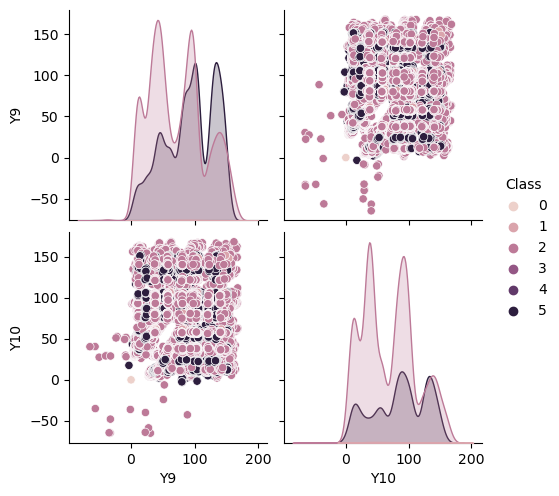

In [216]:
#creates a matrix of correlations
corr_matrix = df.corr() 
#how much each attribute correlates with the Class target variable value, the lower the value the least relevant the feature is
print("\nCorrelations Matrix\n")
print(corr_matrix['Class'].sort_values(ascending=False))#to present all columns their type cannot be object so we must convert it to float

#plot to present the correlation between the 2 most correlated features with target variable
sns.pairplot(df, vars=['Y9', 'Y10'], hue='Class')


## Data processing


In [217]:
#eliminating the first row of the dataset
df = df.iloc[1:]

print(df)



       Class  User         X0          Y0         Z0         X1          Y1  \
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
5          1     0  55.142401   71.435607 -64.177303  36.175818   81.556874   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

In [218]:
#eliminating the last 3 columns because they have more than 99,9% of Nan values
df = df.iloc[:, :-3]

print(df)

#create dummies to change the variable user from numeric to categorical, adding a column for each user
df = pd.concat([df,pd.get_dummies(df['User'], prefix= 'user')], axis = 1)
print(df)

#eliminating the original numerical User column
df = df.drop(columns=["User"])

print(df.info())



       Class  User         X0          Y0         Z0         X1          Y1  \
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
5          1     0  55.142401   71.435607 -64.177303  36.175818   81.556874   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

### Train Test Split


In [219]:
#defining the X and y for the train test split
X = df.iloc[:, 1:]#all columns starting from index 1 onward
y = df.iloc[:, 0]#first column of the dataset "Class" target variable column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

X_train.info()
print("\n")
y_train.info()
print("\n")
X_test.info()
print("\n")
y_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58571 entries, 59111 to 15726
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X0       58571 non-null  float64
 1   Y0       58571 non-null  float64
 2   Z0       58571 non-null  float64
 3   X1       58571 non-null  float64
 4   Y1       58571 non-null  float64
 5   Z1       58571 non-null  float64
 6   X2       58571 non-null  float64
 7   Y2       58571 non-null  float64
 8   Z2       58571 non-null  float64
 9   X3       58042 non-null  float64
 10  Y3       58042 non-null  float64
 11  Z3       58042 non-null  float64
 12  X4       56226 non-null  float64
 13  Y4       56226 non-null  float64
 14  Z4       56226 non-null  float64
 15  X5       48842 non-null  float64
 16  Y5       48842 non-null  float64
 17  Z5       48842 non-null  float64
 18  X6       39210 non-null  float64
 19  Y6       39210 non-null  float64
 20  Z6       39210 non-null  float64
 21  X7      

### Scaling, Imputation and Classification models

#### Auxiliar functions

In [221]:
'''def runner(scaler, imputer, modeler, X_train, y_train, X_test):
    #heavy duty modeler, outputing predictions
    #scaling
    scaler.fit(X_train)
    Xt_train = scaler.transform(X_train)
    Xt_test  = scaler.transform(X_test)

    #imputing
    imputer.fit(Xt_train)
    Xt_train = imp.transform(Xt_train)
    Xt_test  = imp.transform(Xt_test)

    #model fit
    modeler.fit(Xt_train, y_train)

    return modeler.predict(Xt_test)'''

# Execute list of scalers, imputers,models,model_paramsresults and present the results 
def test_models (scalers, imputers,models, X_train, y_train, X_test,y_test, verbose):#a dir do models ,model_params, dir dos models results,
    results =[]
    for name_scaler, scaler in scalers:
        for name_imputer, imputer in imputers:
            for name_mod, model in models:
                #scaling
                scaler.fit(X_train)
                Xt_train = scaler.transform(X_train)
                Xt_test  = scaler.transform(X_test)

                #imputing
                imputer.fit(Xt_train)
                Xt_train = imputer.transform(Xt_train)
                Xt_test  = imputer.transform(Xt_test)


                model.fit(Xt_train, y_train)
                preds = model.predict(Xt_test) #PREDICTION

                if verbose:
                    print(f"Scaler: {name_scaler} {scaler} imputer: {name_imputer} {imputer} classifier: {name_mod} {model}")
                    #hist_simple (preds, 'Histogram of preds: model %s' % name_mod)

                #model instead model: Future Roadmap
                results = save_results (name_scaler, scaler, name_imputer, imputer, name_mod, model, model, results,y_test, preds, verbose) #pipeline clf instead of est to be saved
    
    results_sorted = sorted(results, key=lambda x: x[9], reverse=True) #f1 sorted decreasing
    display_results(results_sorted)
    return results



# Save the model scores and present intermediate results (w/ verbose)
# Returns the list with the saved results 
def save_results(name_scaler, scaler,name_imputer, imputer, name_mod, model, param, results,y_test, preds, verbose):

    # Calculate the precision, recall, f1 and mcc scores
    #the target variable Class has 5 different values so we need to do a weighted average for the precision, recall and f1 scores
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    mcc = matthews_corrcoef(y_test, preds)
    
    if verbose:
        print(f"Scaler: {scaler} imputer: {imputer} classifier: {name_mod} {model}")
        print("The Precision is: %7.4f" % precision)
        print("The Recall is: %7.4f" % recall)
        print("The F1 score is: %7.4f" % f1)
        print("The Matthews correlation coefficient is: %7.4f" % mcc)
        print()
        print("This is the Confusion Matrix")
        print(pd.DataFrame(confusion_matrix(y_test, preds)))


    results.append((name_scaler,
                    scaler,
                    name_imputer, 
                    imputer, 
                    name_mod, 
                    model,
                    param,
                    precision,
                    recall,
                    f1,
                    mcc,                    
                    ))
    return results

# Display the model final results. Receives the ordered results to present
def display_results (results):        
    
    noshow = ""
    print (f"\n--------------------------Results for Classification Models Performance--------------------------")
    for res in results:
        name_scaler = res [0]
        scaler = res [1]
        name_imputer = res [2]
        imputer = res [3]
        name_mod = res [4]
        model = res [5]
        param = res [6]
        precision = res [7]
        recall = res [8]
        f1 = res [9]
        mcc = res [10]

        print(f"{name_mod.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}| mcc     {mcc:.4f}")
        print(f"{noshow.ljust(25)} | scaler {name_scaler} | imputer {name_imputer}")  
              # | estimator {estimator:.4f}  | param     {param:.4f}



'''def present_class_statistics(y_test, preds):
    #the target variable Class has 5 different values so we need to do a weighted average for the precision, recall and f1 scores
    print("The Precision is: %7.4f" % precision_score(y_test, preds, average='weighted'))
    print("The Recall is: %7.4f" % recall_score(y_test, preds, average='weighted'))
    print("The F1 score is: %7.4f" % f1_score(y_test, preds, average='weighted'))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(y_test, preds)))'''

    

'def present_class_statistics(y_test, preds):\n    #the target variable Class has 5 different values so we need to do a weighted average for the precision, recall and f1 scores\n    print("The Precision is: %7.4f" % precision_score(y_test, preds, average=\'weighted\'))\n    print("The Recall is: %7.4f" % recall_score(y_test, preds, average=\'weighted\'))\n    print("The F1 score is: %7.4f" % f1_score(y_test, preds, average=\'weighted\'))\n    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))\n    print()\n    print("This is the Confusion Matrix")\n    print(pd.DataFrame(confusion_matrix(y_test, preds)))'

In [222]:
# Defining a list of scalers
scalers = [
    ('PowerTransformer', PowerTransformer()),
    ('MinMaxScaler', MinMaxScaler()),
    ('StandardScaler', StandardScaler())
]

# Defining a list of Imputers
imputers = [
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('KNNImputer', KNNImputer(n_neighbors=3)) # check if it is worth it to use weight = gaussian or uniform
]

# Defining a list of classification models
classification_models = [
    ('LogisticRegression', LogisticRegression(C = 0.01)),
    ('LogisticRegression', LogisticRegression(C = 1)),
    #('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('DecisionTree_maxd10', DecisionTreeClassifier(max_depth = 10)),
    ('DecisionTree_maxd20', DecisionTreeClassifier(max_depth = 20)),
    ('DecisionTree_minsl20', DecisionTreeClassifier(min_samples_leaf = 5)),
    ('DecisionTree_minsl', DecisionTreeClassifier(min_samples_leaf = 10)),
    ('DecisionTree_critgini', DecisionTreeClassifier(criterion = 'gini')),
    ('DecisionTree_critentropy', DecisionTreeClassifier(criterion = 'entropy')),
    ('GaussianNB', GaussianNB()),
    ('KNN_K3_balltree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'ball_tree')), #### TO WORK algoritm....'algorithm': ['ball_tree'
    #('KNN_K3_kdtree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree')), #### TO WORK algoritm....'algorithm': ['ball_tree'
    ('KNN_K5_balltree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree')), #### TO WORK algoritm....'algorithm': ['ball_tree'
    #('KNN_K5_kdtree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree')), #### TO WORK algoritm....'algorithm': ['ball_tree'
    ('KNN_K5_balltree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree',weights = 'distance'  )), #### TO WORK algoritm....'algorithm': ['ball_tree'
    ('KNN_K5_kdtree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree',weights = 'distance'  )) #### TO WORK algoritm....'algorithm': ['ball_tree'
]


results_classification = []
VERBOSE = True

results_classification =  test_models (scalers, imputers, classification_models, X_train, y_train, X_test,y_test, VERBOSE)#a dir dos classification_models , class_param_grid

#retirar verbose verificar


Scaler: PowerTransformer PowerTransformer() imputer: SimpleImputer SimpleImputer() classifier: LogisticRegression LogisticRegression(C=0.01)
Scaler: PowerTransformer() imputer: SimpleImputer() classifier: LogisticRegression LogisticRegression(C=0.01)
The Precision is:  0.8365
The Recall is:  0.8373
The F1 score is:  0.8366
The Matthews correlation coefficient is:  0.7967

This is the Confusion Matrix
      0     1     2     3     4
0  3653    10   242    65   125
1    25  3388    36    15   276
2   203    32  3496   278    81
3   254    61   429  2675   257
4    55   281    93   358  3136


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaler: PowerTransformer PowerTransformer() imputer: SimpleImputer SimpleImputer() classifier: LogisticRegression LogisticRegression(C=1)
Scaler: PowerTransformer() imputer: SimpleImputer() classifier: LogisticRegression LogisticRegression(C=1)
The Precision is:  0.8500
The Recall is:  0.8510
The F1 score is:  0.8503
The Matthews correlation coefficient is:  0.8137

This is the Confusion Matrix
      0     1     2     3     4
0  3705    10   198    90    92
1    26  3428    34    13   239
2   203    25  3540   270    52
3   247    43   341  2774   271
4    46   281    86   343  3167
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImputer SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
Scaler: PowerTransformer() imputer: SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.9047
The Recall is:  0.9021
The F1 score is:  0.9023
The Matthews correlation coefficient is:  0.8781

This is the C

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: PowerTransformer PowerTransformer() imputer: SimpleImputer SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
Scaler: PowerTransformer() imputer: SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9517
The Recall is:  0.9511
The F1 score is:  0.9510
The Matthews correlation coefficient is:  0.9390

This is the Confusion Matrix
      0     1     2     3     4
0  4077    13     5     0     0
1    30  3527    35    97    51
2    65     2  3955    67     1
3    30    12   200  3433     1
4    47   177    74    48  3577
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImputer SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
Scaler: PowerTransformer() imputer: SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9424
The Recall is:  0.9413
The F1 score is:  

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaler: PowerTransformer PowerTransformer() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: LogisticRegression LogisticRegression(C=1)
Scaler: PowerTransformer() imputer: SimpleImputer(strategy='median') classifier: LogisticRegression LogisticRegression(C=1)
The Precision is:  0.8211
The Recall is:  0.8219
The F1 score is:  0.8212
The Matthews correlation coefficient is:  0.7774

This is the Confusion Matrix
      0     1     2     3     4
0  3574    10   250   112   149
1    25  3409    39    20   247
2   245    33  3347   306   159
3   268    55   474  2609   270
4    87   271   125   332  3108
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
Scaler: PowerTransformer() imputer: SimpleImputer(strategy='median') classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8957
The Recall is:  0.8953
The F1 score is:  0.

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: PowerTransformer PowerTransformer() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
Scaler: PowerTransformer() imputer: SimpleImputer(strategy='median') classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9513
The Recall is:  0.9507
The F1 score is:  0.9505
The Matthews correlation coefficient is:  0.9385

This is the Confusion Matrix
      0     1     2     3     4
0  4078    12     4     0     1
1    34  3534    32    89    51
2    66     2  3950    71     1
3    32    11   203  3429     1
4    55   176    72    50  3570
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
Scaler: PowerTransformer() imputer: SimpleImputer(strategy='median') classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaler: PowerTransformer PowerTransformer() imputer: KNNImputer KNNImputer(n_neighbors=3) classifier: LogisticRegression LogisticRegression(C=1)
Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=3) classifier: LogisticRegression LogisticRegression(C=1)
The Precision is:  0.8267
The Recall is:  0.8283
The F1 score is:  0.8271
The Matthews correlation coefficient is:  0.7854

This is the Confusion Matrix
      0     1     2     3     4
0  3739    12   182    55   107
1    22  3379    74    49   216
2   194    42  3332   426    96
3   237   113   470  2561   295
4   104   271   124   263  3161
Scaler: PowerTransformer PowerTransformer() imputer: KNNImputer KNNImputer(n_neighbors=3) classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=3) classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.7950
The Recall is:  0.7955
The F1 score is:  0.7944
The Matthews correlation coef

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImputer SimpleImputer() classifier: LogisticRegression LogisticRegression(C=0.01)
Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: LogisticRegression LogisticRegression(C=0.01)
The Precision is:  0.7759
The Recall is:  0.7765
The F1 score is:  0.7738
The Matthews correlation coefficient is:  0.7212

This is the Confusion Matrix
      0     1     2     3     4
0  3517    27   283    56   212
1    23  3271    62    40   344
2   424    72  3150   361    83
3   321   122   750  2181   302
4   128   361   149   244  3041


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImputer SimpleImputer() classifier: LogisticRegression LogisticRegression(C=1)
Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: LogisticRegression LogisticRegression(C=1)
The Precision is:  0.8069
The Recall is:  0.8075
The F1 score is:  0.8070
The Matthews correlation coefficient is:  0.7593

This is the Confusion Matrix
      0     1     2     3     4
0  3491    15   293   187   109
1    78  3260    55    23   324
2   213    57  3400   285   135
3   171   104   416  2677   308
4   152   349   130   355  2937
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImputer SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.9070
The Recall is:  0.9050
The F1 score is:  0.9052
The Matthews correlation coefficient is:  0.8816

This is the Confusion Matrix
      0 

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImputer SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9571
The Recall is:  0.9566
The F1 score is:  0.9565
The Matthews correlation coefficient is:  0.9459

This is the Confusion Matrix
      0     1     2     3     4
0  4080    12     3     0     0
1    18  3565    25    81    51
2    62     1  3964    62     1
3    25    12   185  3454     0
4    21   166    72    50  3614
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImputer SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9468
The Recall is:  0.9459
The F1 score is:  0.9458
The Matthews corr

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: LogisticRegression LogisticRegression(C=0.01)
Scaler: MinMaxScaler() imputer: SimpleImputer(strategy='median') classifier: LogisticRegression LogisticRegression(C=0.01)
The Precision is:  0.7661
The Recall is:  0.7671
The F1 score is:  0.7640
The Matthews correlation coefficient is:  0.7096

This is the Confusion Matrix
      0     1     2     3     4
0  3508    28   282    60   217
1    25  3294    62    48   311
2   415    84  3098   398    95
3   353   117   790  2102   314
4   172   355   186   235  2975


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: LogisticRegression LogisticRegression(C=1)
Scaler: MinMaxScaler() imputer: SimpleImputer(strategy='median') classifier: LogisticRegression LogisticRegression(C=1)
The Precision is:  0.7919
The Recall is:  0.7924
The F1 score is:  0.7916
The Matthews correlation coefficient is:  0.7404

This is the Confusion Matrix
      0     1     2     3     4
0  3498    24   282    91   200
1    50  3277    51    23   339
2   221    49  3254   392   174
3   265    81   561  2492   277
4   168   318   183   305  2949
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
Scaler: MinMaxScaler() imputer: SimpleImputer(strategy='median') classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8955
The Recall is:  0.8952
The F1 score is:  0.8951
The Matthews correl

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
Scaler: MinMaxScaler() imputer: SimpleImputer(strategy='median') classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9553
The Recall is:  0.9547
The F1 score is:  0.9546
The Matthews correlation coefficient is:  0.9435

This is the Confusion Matrix
      0     1     2     3     4
0  4080    13     2     0     0
1    20  3555    29    82    54
2    60     2  3965    62     1
3    30    12   198  3435     1
4    28   168    75    47  3605
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
Scaler: MinMaxScaler() imputer: SimpleImputer(strategy='median') classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.94

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImputer KNNImputer(n_neighbors=3) classifier: LogisticRegression LogisticRegression(C=0.01)
Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=3) classifier: LogisticRegression LogisticRegression(C=0.01)
The Precision is:  0.7557
The Recall is:  0.7578
The F1 score is:  0.7557
The Matthews correlation coefficient is:  0.6975

This is the Confusion Matrix
      0     1     2     3     4
0  3562    45   203    80   205
1    27  3143   163   184   223
2   355   128  2996   481   130
3   257   154   760  2198   307
4   207   420   176   223  2897


c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImputer KNNImputer(n_neighbors=3) classifier: LogisticRegression LogisticRegression(C=1)
Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=3) classifier: LogisticRegression LogisticRegression(C=1)
The Precision is:  0.7687
The Recall is:  0.7704
The F1 score is:  0.7691
The Matthews correlation coefficient is:  0.7130

This is the Confusion Matrix
      0     1     2     3     4
0  3533    10   285    92   175
1    32  3214   126   122   246
2   358    84  3037   467   144
3   184   181   592  2361   358
4   181   358   174   313  2897
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImputer KNNImputer(n_neighbors=3) classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=3) classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8115
The Recall is:  0.8074
The F1 score is:  0.8080
The Matthews correlation coefficient is:  0.7598

Thi

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaler: StandardScaler StandardScaler() imputer: SimpleImputer SimpleImputer() classifier: LogisticRegression LogisticRegression(C=1)
Scaler: StandardScaler() imputer: SimpleImputer() classifier: LogisticRegression LogisticRegression(C=1)
The Precision is:  0.8510
The Recall is:  0.8518
The F1 score is:  0.8512
The Matthews correlation coefficient is:  0.8147

This is the Confusion Matrix
      0     1     2     3     4
0  3702    10   203    88    92
1    25  3427    33    14   241
2   201    22  3536   279    52
3   237    41   330  2791   277
4    47   276    82   344  3174
Scaler: StandardScaler StandardScaler() imputer: SimpleImputer SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
Scaler: StandardScaler() imputer: SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.9066
The Recall is:  0.9047
The F1 score is:  0.9048
The Matthews correlation coefficient is:  0.8812

This is the Confusion Mat

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: StandardScaler StandardScaler() imputer: SimpleImputer SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
Scaler: StandardScaler() imputer: SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9516
The Recall is:  0.9509
The F1 score is:  0.9508
The Matthews correlation coefficient is:  0.9389

This is the Confusion Matrix
      0     1     2     3     4
0  4078    12     5     0     0
1    28  3533    33    97    49
2    65     1  3955    68     1
3    31    12   203  3429     1
4    51   174    75    52  3571
Scaler: StandardScaler StandardScaler() imputer: SimpleImputer SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
Scaler: StandardScaler() imputer: SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9417
The Recall is:  0.9405
The F1 score is:  0.9403
The M

c:\Users\guilh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: StandardScaler StandardScaler() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
Scaler: StandardScaler() imputer: SimpleImputer(strategy='median') classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9512
The Recall is:  0.9505
The F1 score is:  0.9503
The Matthews correlation coefficient is:  0.9383

This is the Confusion Matrix
      0     1     2     3     4
0  4077    13     4     0     1
1    29  3536    35    91    49
2    66     2  3949    72     1
3    34    11   208  3422     1
4    54   172    72    52  3573
Scaler: StandardScaler StandardScaler() imputer: SimpleImputer SimpleImputer(strategy='median') classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
Scaler: StandardScaler() imputer: SimpleImputer(strategy='median') classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precisi

In [ ]:
# variable to classify is the first column Class, with values ranging between 1 and 5

#the user column has values ranging between 0 and 14 skipping the 3 , transformar a coluna user em 14 colunas de 0 ou 1 (true or false dummies)

# ? values replace them with another value Nan
#these Nan values should be imputed with an imputer 

# the last 3 columns X11 ,Y11 and Z11 only have 31 non null values, so doing the mean of the whole dataset these columns will not add nothing, so i will ELIMINATE THEM
# from the X8 the number of values non null starts to reduce gradually so the last columns can have a reduced impact on the dataset CHECK THIS!!!

#ir tp6 AA e ver  o runner no fim da tp fazer um dicionario com diferentes scalers, imputers e models (talvez alterar os hyperparametros de cada model ou seja mais um ciclo ) 3 ciclos for e verificar
#os valores do predict para avaliar a performance, ver qual escolher precision recall o que fizer mais csentido e guardar numa val temporaria e comparar para obter o best model.

#verificar os outliers na EDA para melhor entendimento da situacao 
#fazer a mtriz de correlaçoes apos alterar os ? para Na e trocar o type das colunas de object para float para um melhor entendimento de resto aplicar o dicionario acim descrito e testar

# ver se o OneHotEncoder do skicit learn e melhor do qu3e o get dummies para trasformar a colua user em 14 colunas

#verificar se é interessante aplicar e verificar os outliers no EDA


#scalers : powerTransformer, StandardScaler, MinMaxScaler
#imputers : SimpleImputer, KNN imputer
#models for classification: Linear models : LogisticRegression
#Tree Based Models: DecisionTreeClassifier with max_depth and min_samples_leaf hyperparameters
#Naive Bayes : GaussianNB or CategoricalNB
#K nearest Neighbors : KNeighborsClassifier



'''scaler = PowerTransformer()#StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='median')#mean
knn = KNeighborsClassifier(n_neighbors=3, weights= gaussian) # gaussian nao teve impacto

preds=runner(scaler, imp, knn, X_train, y_train, X_test)
present_class_statistics(y_test, preds)'''

#meter os models imputers e scalers a bruta logo em listas com os hyperparametros logo
